<a href="https://colab.research.google.com/github/SaashaJoshi/tf-keras-pytorch-examples/blob/master/PyTorch/pytorch_handwriting_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)    # Helps in iterating the data using iter(trainloader)

In [3]:
data = iter(trainloader)
images, labels = data.next()
print(type(images))
print(images.shape) # Batch = 64 images (28, 28, 1) i.e. grayscale images
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


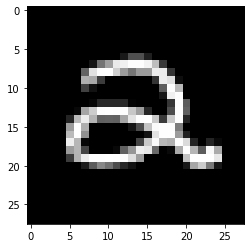

In [4]:
plt.imshow(images[0].numpy().squeeze(), cmap = 'gray')     # .squeeze returns a tensor with all the dimensions of input of size 1 removed. input: (1, 28, 28) output: (28, 28)

In [5]:
def sigmoid_activation(x):
  return 1 /(1 + torch.exp(-x))

In [ ]:
'''
Neural Network Architecture

Input Layer
inputs: (64, 784) [batch_size = 64]

Hidden Layer 1
inputs = inputs: (64, 784)
weight1: (input_size, output_size) = (784, 256)
bias1: (input_size) = (256)
output_hidden_layer1 (h1): (64, 256) [batch_size = 64]

** output = actvation(torch.mm(inputs, weights) + bias) **

# Check why not torch.mm(weights, inputs) as in the theoretical formula!!

Output Layer
inputs = output of hidden layer 1: (64, 256)
weight2: (256, 10) [10 outputs to classify numbers from 0 to 9]
bias2: (10)
final_output (output): (64, 10) [batch_size = 64]

'''

In [6]:
# Flatten the input (images) to dimension of (64, 784)

inputs = images.view(images.shape[0], -1)   # .view reshapes the images to (64, 784). Refer below.
print(inputs.shape)

# images.shape[0] gievs the batch_size

torch.Size([64, 784])


In [87]:
'''
Reshape functions and their working

img = torch.randn(64, 28, 28)
print(img.shape)

# img = img.reshape(64, -1)
# img.resize_(64, -1)
img = img.view(64, -1)
print(img.shape)    # All 3 variants produce (64, 784)
'''

'\nReshape functions and their working\n\nimg = torch.randn(64, 28, 28)\nprint(img.shape)\n\n# img = img.reshape(64, -1)\n# img.resize_(64, -1)\nimg = img.view(64, -1)\nprint(img.shape)    # All 3 variants produce (64, 784)\n'

In [7]:
# weights W(input_size, hidden_size) and bias B(hidden_size, output_size)
W1 = torch.randn(784, 256)
B1 = torch.randn(256)     # Check bias = torch.randn(256, 64)!
# Error: The size of tensor a (256) must match the size of tensor b (64) at non-singleton dimension 1.

W2 = torch.randn(256, 10)
B2 = torch.randn(10)

h1 = sigmoid_activation(torch.mm(inputs, W1) + B1)
output = sigmoid_activation(torch.mm(h1, W2) + B2)
print(output)

tensor([[9.7746e-07, 9.0075e-06, 1.7139e-06, 2.0623e-04, 9.9999e-01, 9.9880e-01,
         2.3687e-05, 8.9603e-01, 1.0000e+00, 4.7987e-06],
        [1.6461e-03, 2.2016e-02, 1.9584e-09, 5.0734e-01, 9.9987e-01, 9.9903e-01,
         2.6726e-03, 3.2245e-03, 9.9838e-01, 4.5940e-06],
        [8.1079e-06, 4.9693e-06, 1.3090e-08, 1.0341e-06, 1.0000e+00, 1.0000e+00,
         1.6189e-06, 2.3561e-01, 1.0000e+00, 4.4318e-06],
        [1.2884e-08, 3.4453e-01, 3.4516e-05, 1.2746e-03, 9.7622e-01, 9.9451e-01,
         6.5933e-01, 9.9733e-01, 1.0000e+00, 1.3656e-07],
        [5.1864e-01, 9.9970e-01, 5.2125e-11, 8.8268e-01, 9.9956e-01, 1.0000e+00,
         4.0783e-03, 1.3839e-04, 1.0000e+00, 2.3973e-05],
        [5.4091e-05, 6.0377e-04, 4.1546e-08, 2.4275e-04, 1.0000e+00, 1.0000e+00,
         2.7375e-07, 3.9004e-01, 1.0000e+00, 3.2752e-09],
        [1.1096e-06, 7.1171e-04, 8.1656e-13, 1.1496e-01, 9.9991e-01, 1.0000e+00,
         2.2206e-09, 9.3480e-04, 1.0000e+00, 2.5389e-10],
        [3.3981e-01, 9.3409

In [8]:
def softmax_activation(x):
  return torch.exp(x) / torch.sum(torch.exp(x), dim = 1).view(-1, 1)    # dim = 1 means to sum across the columns in one row.

'''
torch.exp(x) is a (64, 10) tensor.
whereas, torch.sum(torch.exp(x), dim = 1) is a (64) vector.
Thus, to (check how does this calculation works) we reshape the vector by using .view()
'''

In [9]:
probability = softmax_activation(output)
print(probability.shape)
print(probability.sum(dim = 1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [9]:
# Or apply softmax activation to the output layer only.

h1 = sigmoid_activation(torch.mm(inputs, W1) + B1)
output = softmax_activation(torch.mm(h1, W2) + B2)
print(output.shape)
print(output.sum(dim =))
# Softmax finds out the probability. Thus, the probabilities across all 10 numbers from 0 to 9 should be 1

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
